In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [24]:
#Load the dataset into a DataFrame named df_data.
df_data=pd.read_csv('/Users/pegahafshar/Downloads/parkinsons.csv')

In [25]:
df_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [26]:
df_data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [32]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null flo

In [28]:
df_data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [29]:
#Drop the name column. This column is not a feature required by the model.
df_data.drop('name', axis=1,inplace=True)

In [30]:
#Create a DataFrame named X containing all the columns except the status.
X=df_data.drop('status',axis=1)

In [33]:
#Create a DataFrame named y containing the status.
y=df_data['status']

In [34]:
#Split the dataset into a training set and a test set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)

In [37]:
#Instantiate a logistic regression classifier with an lbfgs solver and penalty set to none.
lr1=LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000)

In [38]:
#Fit the classifier to the data.
lr1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#If the algorithm fails to converge, what can you change to fix that?
#increased the number of iter to 1000.

In [39]:
#Calculate and print the accuracy of the model on the test data.
print('accuracy is:{}'.format(lr1.score(X_test,y_test)))

accuracy is:0.7755102040816326


In [40]:
#Train another model with L2 regularization and compare the accuracy of the new model to the previous one.
lr2=LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000)
lr2.fit(X_train,y_train)
print('accuracy is:{}'.format(lr2.score(X_test,y_test)))

accuracy is:0.8571428571428571


In [45]:
#Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.05. 
#Plot a graph to show the accuracy of the test data versus the accuracy of the training data. 
#Select an appropriate value for C and explain why that may be the best value.
test_acuracy=[]
train_acuracy=[]
for c in np.arange(0.05,1.5,0.05):
    lr3=LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000,C=c)
    lr3.fit(X_train,y_train)
    test_acuracy.append(lr3.score(X_test,y_test))
    train_acuracy.append(lr3.score(X_train,y_train))
    

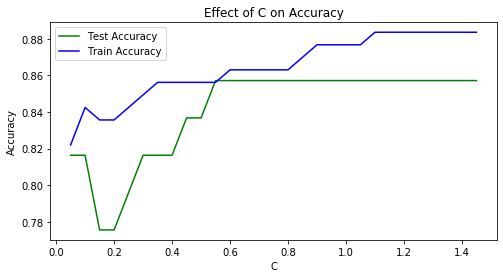

In [50]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c, test_acuracy, '-g', label='Test Accuracy')
ax1.plot(c, train_acuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [ ]:
#Best C choice is between 0.5,0.65 that test and train accuracy are close.